In [3]:
file_path = "../k6.csv"
defaultFs = 14

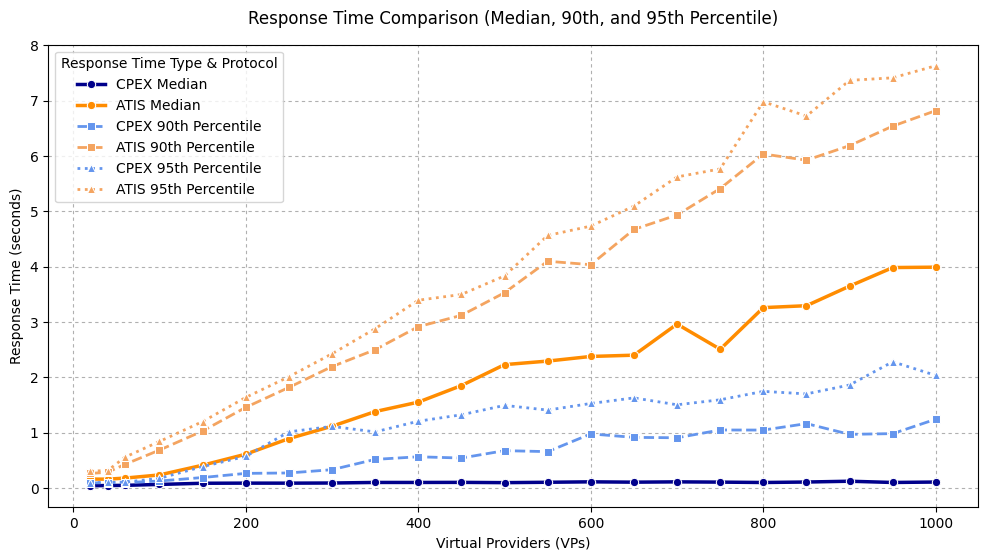

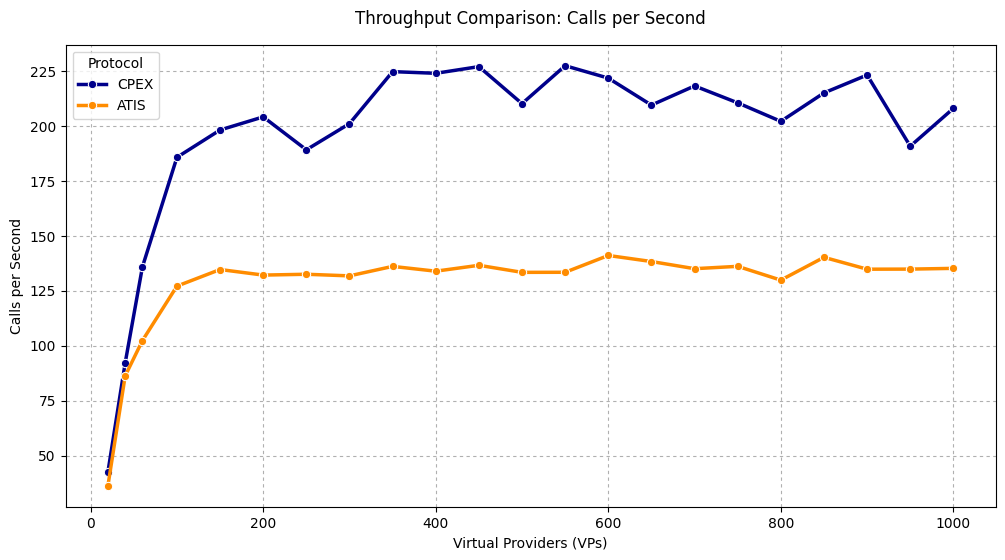

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv(file_path)

# Convert response times from milliseconds to seconds
df["Median"] = df["Median"] / 1000
df["P(90)"] = df["P(90)"] / 1000
df["P(95)"] = df["P(95)"] / 1000

# ------------------------------ Response Time Chart ------------------------------
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get current axis

# Define colors for better contrast
color_medians = {"cpex": "darkblue", "atis": "darkorange"}  # Bold colors for medians
color_percentiles = {"cpex": "cornflowerblue", "atis": "sandybrown"}  # Softer but still visible

# Plot Medians (Bold, Solid Lines)
sns.lineplot(data=df[df["Protocol"] == "cpex"], x="VUs", y="Median", color=color_medians["cpex"], marker="o", linestyle="solid", linewidth=2.5, label="CPEX Median")
sns.lineplot(data=df[df["Protocol"] == "atis"], x="VUs", y="Median", color=color_medians["atis"], marker="o", linestyle="solid", linewidth=2.5, label="ATIS Median")

# Plot P90 (Balanced, Dashed Lines)
sns.lineplot(data=df[df["Protocol"] == "cpex"], x="VUs", y="P(90)", color=color_percentiles["cpex"], marker="s", linestyle="dashed", linewidth=2, label="CPEX 90th Percentile")
sns.lineplot(data=df[df["Protocol"] == "atis"], x="VUs", y="P(90)", color=color_percentiles["atis"], marker="s", linestyle="dashed", linewidth=2, label="ATIS 90th Percentile")

# Plot P95 (Balanced, Dotted Lines)
sns.lineplot(data=df[df["Protocol"] == "cpex"], x="VUs", y="P(95)", color=color_percentiles["cpex"], marker="^", linestyle="dotted", linewidth=2, label="CPEX 95th Percentile")
sns.lineplot(data=df[df["Protocol"] == "atis"], x="VUs", y="P(95)", color=color_percentiles["atis"], marker="^", linestyle="dotted", linewidth=2, label="ATIS 95th Percentile")

plt.title("Response Time Comparison (Median, 90th, and 95th Percentile)", pad=15)  # Added space
plt.xlabel("Virtual Providers (VPs)")
plt.ylabel("Response Time (seconds)")  # Updated to seconds
plt.legend(title="Response Time Type & Protocol")
plt.grid(True, linestyle=(0, (3, 3)), linewidth=0.8)  # Small dashed grid lines

# Save to PDF (Preserve UI exactly, no extra borders)
plt.savefig("../charts/response_time_comparison.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()

# ------------------------------ Calls per Second Chart ------------------------------
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get current axis

# Define colors for CPEX and ATIS
color_calls = {"cpex": "darkblue", "atis": "darkorange"}

# Plot Calls per Second
sns.lineplot(data=df[df["Protocol"] == "cpex"], x="VUs", y="Calls/s", color=color_calls["cpex"], marker="o", linestyle="solid", linewidth=2.5, label="CPEX")
sns.lineplot(data=df[df["Protocol"] == "atis"], x="VUs", y="Calls/s", color=color_calls["atis"], marker="o", linestyle="solid", linewidth=2.5, label="ATIS")

plt.title("Throughput Comparison: Calls per Second", pad=15)  # Added space
plt.xlabel("Virtual Providers (VPs)")
plt.ylabel("Calls per Second")
plt.legend(title="Protocol")
plt.grid(True, linestyle=(0, (3, 3)), linewidth=0.8)  # Small dashed grid lines

# Save to PDF (Preserve UI exactly, no extra borders)
plt.savefig("../charts/calls_per_second_comparison.pdf", bbox_inches='tight', dpi=300, transparent=True)
plt.show()
